In [1]:
import pickle as pkl
import random
import networkx as nx
import numpy as np

def my_house():
    g = nx.Graph()
    g.add_edge(0,1)
    g.add_edge(1,2)
    g.add_edge(2,3)
    g.add_edge(0,3)
    g.add_edge(3,4)
    g.add_edge(2,4)
    return(g)

import scipy
nx.__version__,scipy.__version__

('2.8.2', '1.8.1')

# Build BA 2 motifs with random BA edges

In [2]:
def generate_house_networks_BA(nb_house,node_ba=30):
    
    g = nx.barabasi_albert_graph(node_ba,1)
    for i in range(nb_house):
        house = my_house()
        tmp = len(g.nodes)
        g = nx.union(g,house,rename=("a","b"))
        tmp2 = len(g.nodes)
        # connect house BA:
        node_a = np.random.randint(tmp)
        node_b = np.random.randint(tmp,tmp2)
        g.add_edge(list(g.nodes())[node_a],list(g.nodes())[node_b])

        
    mapping = dict()
    c = 0
    for n in g.nodes():
        mapping[n] = c
        c = c + 1
    g = nx.relabel_nodes(g,mapping)
    
    return g

In [3]:
np.random.seed(10)

In [ ]:
adjs = []
labels = []
feas = []
for i in range(1000):
    
    g0 = generate_house_networks_BA(0,np.random.randint(15,22))
    g1 = generate_house_networks_BA(1,np.random.randint(15-5,22-5))
    feas.append(np.ones((len(g0.nodes()),10))/10)
    adjs.append(nx.adjacency_matrix(g0).A)
    labels.append(0)
    
    feas.append(np.ones((len(g1.nodes()),10))/10)
    adjs.append(nx.adjacency_matrix(g1).A)
    labels.append(1)
    

In [ ]:
f = open('BA-2motif.pkl','wb')
pkl.dump((adjs,feas,labels),f)
f.close()

# Build BA 2 grid with random BA edges

In [3]:
def generate_grid_networks_BA(nb_house,node_ba=30):
    

    g = nx.barabasi_albert_graph(node_ba,1)
    if nb_house == 0:
         return g
    for i in range(nb_house):
        house = my_grid()
        tmp = len(g.nodes)
        g = nx.union(g,house,rename=("a","b"))
        tmp2 = len(g.nodes)
        # connect house BA:
        node_a = np.random.randint(tmp)
        node_b = np.random.randint(tmp,tmp2)
        g.add_edge(list(g.nodes())[node_a],list(g.nodes())[node_b])

        
    mapping = dict()
    c = 0
    for n in g.nodes():
        mapping[n] = c
        c = c + 1
    g = nx.relabel_nodes(g,mapping)
    
    return g

def my_grid():
    g = nx.Graph()
    g.add_edge(0,1)
    g.add_edge(1,2)
    g.add_edge(0,3)
    g.add_edge(1,4)
    g.add_edge(2,5)
    g.add_edge(3,4)
    g.add_edge(4,5)
    g.add_edge(3,6)
    g.add_edge(4,7)
    g.add_edge(5,8)
    g.add_edge(6,7)
    g.add_edge(7,8)
    
    return g

In [ ]:
adjs = []
labels = []
feas = []
for i in range(1000):
    
    g0 = generate_grid_networks_BA(0,np.random.randint(15,30))
    g1 = generate_grid_networks_BA(1,np.random.randint(15-9,30-9))
    feas.append(np.ones((len(g0.nodes()),10))/10)
    adjs.append(nx.adjacency_matrix(g0).A)
    labels.append(0)
    
    feas.append(np.ones((len(g1.nodes()),10))/10)
    adjs.append(nx.adjacency_matrix(g1).A)
    labels.append(1)
    

In [ ]:
f = open('BA-2grid.pkl','wb')
pkl.dump((adjs,feas,labels),f)
f.close()

In [2]:
30-9

21

# Grid_house

In [4]:
def generate_BA_grid_house(target,node_ba=30):
    
    if target == 0:
        if np.random.rand() >0.5:
            g = nx.barabasi_albert_graph(node_ba-5,1)
            g1 = my_house()
        else:
            g = nx.barabasi_albert_graph(node_ba-9,1)
            g1 = my_grid()
            
        tmp = len(g.nodes)
        g = nx.union(g,g1,rename=("a","b"))
        tmp2 = len(g.nodes)
        
        # connect g to BA:
        node_a = np.random.randint(tmp)
        node_b = np.random.randint(tmp,tmp2)
        g.add_edge(list(g.nodes())[node_a],list(g.nodes())[node_b])
            
    if target == 1:
        g = nx.barabasi_albert_graph(node_ba-9-5,1)
        g1 = my_house()  
        tmp = len(g.nodes)
        g = nx.union(g,g1,rename=("a","b"))
        tmp2 = len(g.nodes)
        # connect g to BA:
        node_a = np.random.randint(tmp)
        node_b = np.random.randint(tmp,tmp2)
        g.add_edge(list(g.nodes())[node_a],list(g.nodes())[node_b])

        
        g1 = my_grid()  
        tmp = len(g.nodes)
        g = nx.union(g,g1,rename=("a","b"))
        tmp2 = len(g.nodes)
        # connect g to BA:
        node_a = np.random.randint(tmp)
        node_b = np.random.randint(tmp,tmp2)
        g.add_edge(list(g.nodes())[node_a],list(g.nodes())[node_b])
        
        
    mapping = dict()
    c = 0
    for n in g.nodes():
        mapping[n] = c
        c = c + 1
    g = nx.relabel_nodes(g,mapping)
    
    return g

In [ ]:
adjs = []
labels = []
feas = []
for i in range(1000):
    
    g0 = generate_BA_grid_house(0,np.random.randint(100,150))
    g1 = generate_BA_grid_house(1,np.random.randint(100,150))
    feas.append(np.ones((len(g0.nodes()),10))/10)
    adjs.append(nx.adjacency_matrix(g0).A)
    labels.append(0)
    
    feas.append(np.ones((len(g1.nodes()),10))/10)
    adjs.append(nx.adjacency_matrix(g1).A)
    labels.append(1)

In [ ]:
f = open('BA-2grid-house_big.pkl','wb')
pkl.dump((adjs,feas,labels),f)
f.close()

# nb of starts

In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
seed = 10
np.random.seed(seed)

def generate_star_network_BA(nb_nodesBA,nb_stars,nb_rewire=10,small_star=10,big_star=16):
    is_connected = False
    while not is_connected:
        g = nx.fast_gnp_random_graph(nb_nodesBA,0.1)
        is_connected = nx.is_connected(g)

    star_size = np.arange(small_star,big_star)
    for i in range(nb_stars):
        size = np.random.choice(star_size)
        star = nx.star_graph(size)
        g = nx.union(g,star,rename=("a","b"))

    mapping = dict()
    c = 0
    for n in g.nodes():
        mapping[n] = c
        c = c + 1
    g = nx.relabel_nodes(g,mapping)
    
    for i in range(nb_rewire):
        a,b = np.random.choice(g.nodes(),2,replace=False)
        if not g.has_edge(a,b):
            g.add_edge(a,b)
            
    Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
    g = g.subgraph(Gcc[0])
    return g


def gen_stars_BA_3class():
    graphs = []
    labels = []
    gt = []
    for i in range(500):
        nb_nodes_BA1 = np.random.randint(30,50)
        g1 = generate_star_network_BA(nb_nodesBA = nb_nodes_BA1,
                                      nb_stars = 1,
                                      nb_rewire=10,small_star=10,big_star=16)
        nb_nodes_BA2 = np.random.randint(30-13,50)
        g2 = generate_star_network_BA(nb_nodesBA = nb_nodes_BA2,
                                      nb_stars = 2,
                                      nb_rewire=10,small_star=10,big_star=16)
        
        nb_nodes_BA3 = np.random.randint(30-26,50-26)
        if 0.5> np.random.randn():
            g3 = generate_star_network_BA(nb_nodesBA = nb_nodes_BA3,
                                          nb_stars = 3,
                                          nb_rewire=10,small_star=10,big_star=16)
        else:
            g3 = generate_star_network_BA(nb_nodesBA = nb_nodes_BA3,
                                          nb_stars = 4,
                                          nb_rewire=10,small_star=10,big_star=16)
        
        if nx.is_connected(g1):
            if nx.is_connected(g2):
                if nx.is_connected(g3):
                    labels.append(0)
                    labels.append(1)
                    labels.append(2)
                    graphs.append(g1)
                    graphs.append(g2)
                    graphs.append(g3)
                    gt.append(nb_nodes_BA1)
                    gt.append(nb_nodes_BA2)
                    gt.append(nb_nodes_BA3)
    
    return graphs,labels,gt

In [ ]:
graphs  ,labels ,gt = gen_stars_BA_3class()

In [ ]:
feas = []
adjs = []
for g in graphs:
    feas.append(np.ones((len(g.nodes()),10))/10)
    adjs.append(nx.adjacency_matrix(g).A)

In [ ]:
len(adjs),len(feas),len(labels)

In [ ]:
f = open('ER-nb_stars.pkl','wb')
pkl.dump((adjs,feas,labels),f)
f.close()

np.save("ER-nb_stars-GT",gt)

# nb stars 2

In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
seed = 10
np.random.seed(seed)

def generate_star_network_BA(nb_nodesBA,nb_stars,nb_rewire=10,star_size=16):
    is_connected = False
    while not is_connected:
        g = nx.fast_gnp_random_graph(nb_nodesBA,0.1)
        is_connected = nx.is_connected(g)

    for i in range(nb_stars):
        star = nx.star_graph(star_size)
        g = nx.union(g,star,rename=("a","b"))

    mapping = dict()
    c = 0
    for n in g.nodes():
        mapping[n] = c
        c = c + 1
    g = nx.relabel_nodes(g,mapping)
    
    for i in range(nb_rewire):
        a,b = np.random.choice(g.nodes(),2,replace=False)
        if not g.has_edge(a,b):
            g.add_edge(a,b)
            
    Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
    g = g.subgraph(Gcc[0])
    return g


def gen_stars_BA_3class():
    graphs = []
    labels = []
    gt = []
    for i in range(500):
        nb_nodes_BA1 = np.random.randint(30,50)
        g1 = generate_star_network_BA(nb_nodesBA = nb_nodes_BA1,
                                      nb_stars = 1,
                                      nb_rewire=10,star_size=16)
        nb_nodes_BA2 = np.random.randint(30-13,50)
        g2 = generate_star_network_BA(nb_nodesBA = nb_nodes_BA2,
                                      nb_stars = 2,
                                      nb_rewire=10,star_size=16)
        
        nb_nodes_BA3 = np.random.randint(30-26,50-26)
        if 0.5> np.random.randn():
            g3 = generate_star_network_BA(nb_nodesBA = nb_nodes_BA3,
                                          nb_stars = 3,
                                          nb_rewire=10,star_size=16)
        else:
            g3 = generate_star_network_BA(nb_nodesBA = nb_nodes_BA3,
                                          nb_stars = 4,
                                          nb_rewire=10,star_size=16)
        
        if nx.is_connected(g1):
            if nx.is_connected(g2):
                if nx.is_connected(g3):
                    labels.append(0)
                    labels.append(1)
                    labels.append(2)
                    graphs.append(g1)
                    graphs.append(g2)
                    graphs.append(g3)
                    gt.append(nb_nodes_BA1)
                    gt.append(nb_nodes_BA2)
                    gt.append(nb_nodes_BA3)
    
    return graphs,labels,gt

In [8]:
graphs  ,labels ,gt = gen_stars_BA_3class()

In [9]:
feas = []
adjs = []
for g in graphs:
    feas.append(np.ones((len(g.nodes()),10))/10)
    adjs.append(nx.adjacency_matrix(g).A)

/tmp/ipykernel_17781/837091998.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjs.append(nx.adjacency_matrix(g).A)
/tmp/ipykernel_17781/837091998.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjs.append(nx.adjacency_matrix(g).A)


In [10]:
len(adjs),len(feas),len(labels)

(1500, 1500, 1500)

In [11]:
f = open('ER-nb_stars2.pkl','wb')
pkl.dump((adjs,feas,labels),f)
f.close()

np.save("ER-nb_stars-GT2",gt)

# Generate  BA-color

In [208]:
def generate_house_networks_BA(nb_house,node_ba=30,house_color="blue"):
    GT = []
    g = nx.barabasi_albert_graph(node_ba,1)
    g = color_ba(g)
    
    nb_nodes_curr = len(g.nodes())
    first = True
    for i in range(nb_house):
        house = my_house()
        if first:
            GT.append(list(np.arange(nb_nodes_curr,nb_nodes_curr+5)))
            house = color_house(house,gt=True,base_color=house_color)
            first = False
        else:
            house = color_house(house,gt=False,base_color=house_color)
        g = nx.union(g,house,rename=("a","b"))
        # connect house BA:
        node_a = np.random.randint(nb_nodes_curr)
        node_b = np.random.choice(5)+nb_nodes_curr
        g.add_edge(list(g.nodes())[node_a],list(g.nodes())[node_b])
        nb_nodes_curr = len(g.nodes())
        
    mapping = dict()
    c = 0
    for n in g.nodes():
        mapping[n] = c
        c = c + 1
    g = nx.relabel_nodes(g,mapping)
    
    return g,GT

def color_ba(g,colors=["red","blue","green"]):
    for n in g.nodes():
        g.nodes()[n]["color"]=np.random.choice(colors)
        
    return g
def color_house(h,gt=True,base_color="blue"):
    if gt == True:
        for n in h.nodes():
            h.nodes()[n]["color"]=base_color
    else:
        if base_color == "blue":
            nodes_h = list(h.nodes())
            h.nodes()[nodes_h[0]]["color"] = "blue"
            h.nodes()[nodes_h[1]]["color"] = "red"
            for n in nodes_h[2:]:
                h.nodes()[n]["color"]=np.random.choice(["red","blue","green"])
        
        if base_color == "green":
            nodes_h = list(h.nodes())
            h.nodes()[nodes_h[0]]["color"] = "green"
            h.nodes()[nodes_h[1]]["color"] = "red"
            for n in nodes_h[2:]:
                h.nodes()[n]["color"]=np.random.choice(["red","blue","green"])
    return h

def get_feat(g):
    emb = []
    for n,c in nx.get_node_attributes(g,"color").items():
        if c == "blue":
            emb.append([1,0,0])
        elif c == "green":
            emb.append([0,1,0])
        else:
            emb.append([0,0,1])
    return emb

In [209]:
feas = []
labels = []
adjs = []
GT = []
for i in range(500):
    nb_houses = np.random.choice(np.arange(1,5))
    nb_nodes = np.random.choice(np.arange(20,51))
    g,gt = generate_house_networks_BA(nb_houses,nb_nodes,house_color="blue")
    GT.append(gt)
    feas.append(get_feat(g))
    adjs.append(nx.adj_matrix(g).A)
    labels.append(0)
    
for i in range(500):
    nb_houses = np.random.choice(np.arange(1,5))
    nb_nodes = np.random.choice(np.arange(20,51))
    g,gt = generate_house_networks_BA(nb_houses,nb_nodes,house_color="green")
    GT.append(gt)
    feas.append(get_feat(g))
    adjs.append(nx.adj_matrix(g).A)
    labels.append(1)

/tmp/ipykernel_10778/2754198198.py:11: DeprecationWarning: adj_matrix is deprecated and will be removed in version 3.0.
Use `adjacency_matrix` instead

  adjs.append(nx.adj_matrix(g).A)
/home/antonio/anaconda3/envs/geometric_new/lib/python3.9/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)
/tmp/ipykernel_10778/2754198198.py:20: DeprecationWarning: adj_matrix is deprecated and will be removed in version 3.0.
Use `adjacency_matrix` instead

  adjs.append(nx.adj_matrix(g).A)


In [217]:
f = open('BA-houses_color.pkl','wb')
pkl.dump((adjs,feas,labels,GT),f)
f.close()

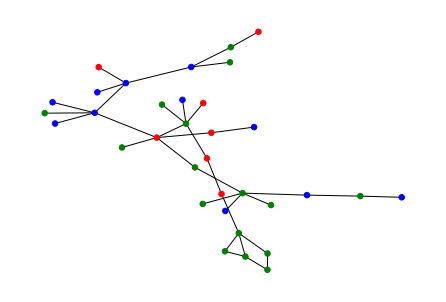

In [211]:
node_color = list(dict(nx.get_node_attributes(g,"color")).values())
nx.draw(g,node_size=30,node_color=node_color)

In [212]:
node_color

['blue',
 'blue',
 'red',
 'green',
 'blue',
 'red',
 'blue',
 'green',
 'green',
 'red',
 'green',
 'green',
 'blue',
 'red',
 'red',
 'blue',
 'green',
 'blue',
 'green',
 'blue',
 'red',
 'blue',
 'green',
 'green',
 'green',
 'red',
 'blue',
 'blue',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green']

# generate stars with colors

In [1]:

def generate_star_network_BA_color_class_1(nb_nodesBA,nb_stars,nb_rewire=10,small_star=10,big_star=16):
    # generate ER base
    is_connected = False
    while not is_connected:
        g = nx.fast_gnp_random_graph(nb_nodesBA,0.1)
        is_connected = nx.is_connected(g)
    # add color to ER
    color = 0
    for n in g.nodes():
        g.nodes()[n]["color"] = 0#np.random.randint(0,3)
        
        
        
    # generate 2 stars color == 1, then color = 2
    star_size = np.arange(small_star,big_star)
    color = color + 1
    centers = []
    for i in range(nb_stars):
        size = np.random.choice(star_size)
        star = nx.star_graph(size)
        for n in star.nodes():
            star.nodes()[n]["color"] = color
            
        centers.append(len(g))
        g = nx.union(g,star,rename=("a","b"))
        a = np.random.choice(list(list(nx.connected_components(g))[0]))
        b = np.random.choice(list(list(nx.connected_components(g))[1]))
        
        g.add_edge(a,b)
        
        if i >= 1:
            color = np.random.choice([0,2])
    
    mapping = dict()
    c = 0
    for n in g.nodes():
        mapping[n] = c
        c = c + 1
    g = nx.relabel_nodes(g,mapping)
    
    return g,centers


In [2]:
def generate_star_network_BA_color_class_0(nb_nodesBA,nb_stars,nb_rewire=10,small_star=10,big_star=16):
    
    no_two_color_1 = False
    
    while not no_two_color_1:
        # generate ER base
        is_connected = False
        while not is_connected:
            g = nx.fast_gnp_random_graph(nb_nodesBA,0.1)
            is_connected = nx.is_connected(g)
        # add color to ER
        
        color = 0
        for n in g.nodes():
            g.nodes()[n]["color"] = 0#np.random.randint(0,3)


        # generate stars with random colors (never 2 star with color == 1)
        star_size = np.arange(small_star,big_star)
        color = 1
        colors_history = []
        centers = []
        for i in range(nb_stars):
            size = np.random.choice(star_size)
            star = nx.star_graph(size)
            for n in star.nodes():
                star.nodes()[n]["color"] = color
            centers.append(len(g))
            g = nx.union(g,star,rename=("a","b"))
            a = np.random.choice(list(list(nx.connected_components(g))[0]))
            b = np.random.choice(list(list(nx.connected_components(g))[1]))

            g.add_edge(a,b)
            
            colors_history.append(color)
            if i >= 1:
                color = np.random.choice([0,1,2])
                

        mapping = dict()
        c = 0
        for n in g.nodes():
            mapping[n] = c
            c = c + 1
        g = nx.relabel_nodes(g,mapping)
        if not colors_history.count(1) == 2:
            no_two_color_1 = True
    return g,centers

In [5]:
graphs = []
labels = []
ground_truth = []
for i in range(10):
    g,gt = generate_star_network_BA_color_class_0(np.random.randint(20,51),4)
    graphs.append(g)
    ground_truth.append(gt)
    labels.append(0)
    
    
    g,gt = generate_star_network_BA_color_class_1(np.random.randint(20,51),4)
    graphs.append(g)
    ground_truth.append(gt)
    labels.append(1)

In [6]:
ground_truth

[[40, 55, 67, 83],
 [34, 48, 62, 76],
 [38, 54, 70, 86],
 [32, 45, 58, 73],
 [31, 46, 61, 77],
 [31, 47, 60, 72],
 [44, 58, 69, 82],
 [45, 59, 73, 88],
 [31, 44, 57, 71],
 [44, 55, 71, 84],
 [28, 40, 54, 67],
 [20, 35, 51, 66],
 [50, 65, 81, 95],
 [46, 58, 72, 87],
 [35, 46, 57, 68],
 [26, 39, 51, 66],
 [35, 48, 60, 74],
 [37, 51, 63, 75],
 [32, 46, 60, 73],
 [26, 37, 49, 61]]

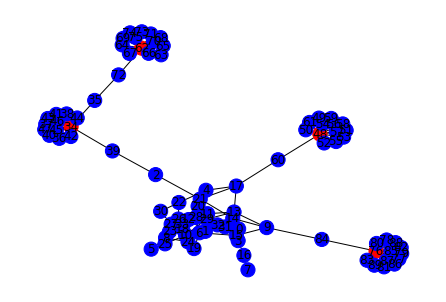

In [15]:
adj = []
feas = []

for g in graphs:
    adj.append(nx.adjacency_matrix(g).A.copy())
    
    node_feat = []
    for k,v in dict(nx.get_node_attributes(g,"color")).items():
        if v == 0:
            node_feat.append([1,0,0])
        if v == 1:
            node_feat.append([0,1,0])
        if v == 2:
            node_feat.append([0,0,1])
    feas.append(node_feat)

<ipython-input-15-aed78551cab8>:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj.append(nx.adjacency_matrix(g).A.copy())


In [16]:
f = open('ER-nb_stars_color.pkl','wb')
pkl.dump((adj,feas,labels),f)
f.close()

In [17]:

np.save("ER-nb_stars_color-GT",ground_truth)

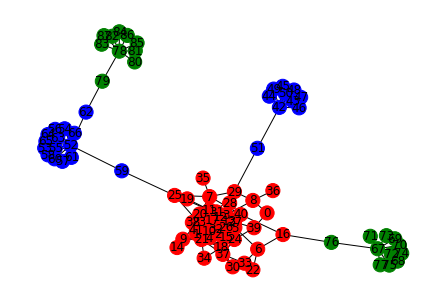

In [31]:
g = graphs[7]
color_map = []
for node in g:
    color = g.nodes()[node]["color"]
    if color == 0:
        color_map.append("red")
    if color == 1:
        color_map.append('blue')
    if color == 2:
        color_map.append('green')   
nx.draw(g, node_color=color_map,node_size=200,with_labels=True)

# below old stuff

In [ ]:
with open('BA-2motif.pkl','rb') as fin:
    (adjs, feas, labels) = pkl.load(fin)
    
    
new_adjs = []
new_x = []
for adj in adjs:
    g = nx.from_numpy_array(adj)
    neig_deg = nx.average_neighbor_degree(g)
    close = nx.closeness_centrality(g)
    betwe = nx.betweenness_centrality(g)
    clust = nx.clustering(g)
    #eig = nx.eigenvector_centrality(g)
    for i in g.nodes():
        
        #w = [clust[i]]#,eig[i]]
        w = [nx.degree(g,i),neig_deg[i],close[i],betwe[i]]#,clust[i]]#,eig[i]]
        g.nodes()[i]["x"]=w
        
        
    adj = nx.adjacency_matrix(g).A
    x = np.array(list(nx.get_node_attributes(g,"x").values()))
    
    new_adjs.append(adj)
    new_x.append(x)

# ba 2 grid

In [ ]:
adjs = []
lab = []
feas = []
kk = 500
for i in range(kk):
    g1 = nx.barabasi_albert_graph(23,1)
    
    adjs.append(nx.adjacency_matrix(g1).A)
    lab.append(0)
    fea = []
    for n in range(23):
        fea.append([0.1]*10)
    feas.append(fea)
    assert(np.max(g1.nodes())+1==len(g1.nodes()))
    
for i in range(kk):
    random_ba = np.random.randint(0,14)
    random_grid = np.random.randint(0,8)
    g = nx.grid_graph(dim=(3,3))
    mapping = {}
    nodes = list(g.nodes()) 
    c = 15
    mapping[nodes[random_grid]] = random_ba
    nodes.remove(nodes[random_grid])
    for i in range(len(nodes)):
        n = nodes[i]
        mapping[n] = c
        c = c + 1

    g = nx.relabel_nodes(g, mapping)

    g1 = nx.barabasi_albert_graph(15,1)

    F = nx.compose(g,g1)
    adjs.append(nx.adjacency_matrix(F).A)
    lab.append(1)
    fea = []
    for n in range(23):
        fea.append([0.1]*10)
    feas.append(fea)
    assert(np.max(F.nodes())+1==len(F.nodes()))

In [ ]:
f = open('BA-2grid.pkl','wb')
pkl.dump((adjs,feas,lab),f)
f.close()

In [ ]:
F = nx.from_numpy_array(adjs[-5])
nx.draw(F,with_labels=True)

# ba_2grid_nodeFeature

In [ ]:
with open('BA-2grid.pkl','rb') as fin:
    (adjs, feas, labels) = pkl.load(fin)

In [ ]:
   
new_adjs = []
new_x = []
for adj in adjs:
    g = nx.from_numpy_array(adj)
    neig_deg = nx.average_neighbor_degree(g)
    close = nx.closeness_centrality(g)
    betwe = nx.betweenness_centrality(g)
    clust = nx.clustering(g)
    #eig = nx.eigenvector_centrality(g)
    for i in g.nodes():
        
        #w = [clust[i]]#,eig[i]]
        w = [nx.degree(g,i),neig_deg[i],close[i],betwe[i]]#,clust[i]]#,eig[i]]
        g.nodes()[i]["x"]=w
        
        
    adj = nx.adjacency_matrix(g).A
    x = np.array(list(nx.get_node_attributes(g,"x").values()))
    
    new_adjs.append(adj)
    new_x.append(x)

In [ ]:
f = open('BA-2grid-nodeFeatures.pkl','wb')
pkl.dump((new_adjs,new_x,labels),f)
f.close()

In [ ]:
with open('BA-2grid-nodeFeatures.pkl','rb') as fin:
    (adjs, feas, labels) = pkl.load(fin)

# ba 2cycle

In [ ]:
adjs = []
lab = []
feas = []
kk = 500
for i in range(kk):
    g1 = nx.barabasi_albert_graph(23,1)
    
    adjs.append(nx.adjacency_matrix(g1).A)
    lab.append(0)
    fea = []
    for n in range(23):
        fea.append([0.1]*10)
    feas.append(fea)
    assert(np.max(g1.nodes())+1==len(g1.nodes()))
    
for i in range(kk):
    
    random_ba = np.random.randint(0,17)
    random_grid = np.random.randint(0,5)
    g = nx.cycle_graph(6)
    mapping = {}
    nodes = list(g.nodes()) 
    c = 18
    mapping[nodes[random_grid]] = random_ba
    nodes.remove(nodes[random_grid])
    for i in range(len(nodes)):
        n = nodes[i]
        mapping[n] = c
        c = c + 1

    g = nx.relabel_nodes(g, mapping)

    g1 = nx.barabasi_albert_graph(18,1)

    F = nx.compose(g,g1)
    adjs.append(nx.adjacency_matrix(F).A)
    lab.append(1)
    fea = []
    for n in range(23):
        fea.append([0.1]*10)
    feas.append(fea)
    assert(np.max(F.nodes())+1==len(F.nodes()))

In [ ]:
f = open('BA-2cycle.pkl','wb')
pkl.dump((adjs,feas,lab),f)
f.close()

# BA_2Cycles_node features 

In [ ]:
with open('BA-2cycle.pkl','rb') as fin:
    (adjs, feas, labels) = pkl.load(fin)

In [ ]:
   
new_adjs = []
new_x = []
for adj in adjs:
    g = nx.from_numpy_array(adj)
    neig_deg = nx.average_neighbor_degree(g)
    close = nx.closeness_centrality(g)
    betwe = nx.betweenness_centrality(g)
    clust = nx.clustering(g)
    #eig = nx.eigenvector_centrality(g)
    for i in g.nodes():
        
        #w = [clust[i]]#,eig[i]]
        w = [nx.degree(g,i),neig_deg[i],close[i],betwe[i]]#,clust[i]]#,eig[i]]
        g.nodes()[i]["x"]=w
        
        
    adj = nx.adjacency_matrix(g).A
    x = np.array(list(nx.get_node_attributes(g,"x").values()))
    
    new_adjs.append(adj)
    new_x.append(x)

In [ ]:
f = open('BA-2cycle-nodeFeatures.pkl','wb')
pkl.dump((new_adjs,new_x,labels),f)
f.close()

# eliminami

In [ ]:
with open('BA-2cycle-nodeFeatures.pkl','rb') as fin:
    (adjs, feas, labels) = pkl.load(fin)

In [ ]:
feas[0],labels[0]

In [ ]:
feas[-1],labels[-1]

In [ ]:
import synthetics as sy
import networkx as nx

In [ ]:
a = sy.generate_dataset_multishape(10)

In [ ]:
from typing import Optional, Callable

import torch
from networkx.generators import random_graphs, lattice, small, classic
from torch_geometric.data import InMemoryDataset, Data
from torch_geometric.utils import barabasi_albert_graph
import networkx as nx
import pickle as pkl
import random
import numpy as np
import torch_geometric.transforms as T
from networkx.algorithms.operators.binary import compose, union

In [ ]:
import numpy as np
def combine_random_graphs(lab=0):
    """
    Combines BA random graph with a small graph with known structure.
    """
    m = 6
    n = np.random.randint(25,29)
    
    
    np.random.default_rng(42)
    p2 = np.random.randint(3)

    # generate random BA graph
    if lab == 0:
        g1 = random_graphs.barabasi_albert_graph(n, m)
        label = 0
    else:
        g1 = random_graphs.barabasi_albert_graph(20, m)
        label = 0
        # generate a small graph with known structure
        if p2 == 0:
            g2 = lattice.grid_2d_graph(3, 3)
        elif p2 == 1:
            g2 = small.house_graph()
        else:
            g2 = classic.wheel_graph(m)

        # merge the two graphs
        g12 = union(g1, g2, rename=('G1', 'G2'))
        a12 = nx.to_numpy_array(g12)
        a12[len(g1) - 1, len(g1) + 1] = 1
        g12 = nx.from_numpy_array(a12)
        g1 = g12
        label = 1
        
    return nx.adjacency_matrix(g1).A, label,list(np.ones((len(g1.nodes()),10))/10)


def generate_dataset_multishape(n_samples):
    """
    Generate a dataset where each sample is a combination of a random BA graph and a small graph with known structure.
    """
    graphs = []
    labels = []
    node_f = []
    p1 = 0
    for i in range(n_samples):
        g, label,nf = combine_random_graphs(0)
        graphs.append(g)
        labels.append(label)
        node_f.append(nf)
    p1 = 1
    for i in range(n_samples):
        g, label,nf = combine_random_graphs(1)
        graphs.append(g)
        labels.append(label)
        node_f.append(nf)
    return graphs, labels,node_f


In [ ]:
g,l,node_f= generate_dataset_multishape(500)

In [ ]:
f = open('BA-multipleShapes.pkl','wb')
pkl.dump((g,node_f,l),f)
f.close()

In [ ]:
with open('BA-multipleShapes.pkl','rb') as fin:
    (adjs, feas, labels) = pkl.load(fin)

In [ ]:
new_adjs = []
new_x = []
for adj in adjs:
    g = nx.from_numpy_array(adj)
    neig_deg = nx.average_neighbor_degree(g)
    close = nx.closeness_centrality(g)
    betwe = nx.betweenness_centrality(g)
    clust = nx.clustering(g)
    #eig = nx.eigenvector_centrality(g)
    for i in g.nodes():
        
        #w = [clust[i]]#,eig[i]]
        w = [nx.degree(g,i),neig_deg[i],close[i],betwe[i]]#,clust[i]]#,eig[i]]
        g.nodes()[i]["x"]=w
        
        
    adj = nx.adjacency_matrix(g).A
    x = np.array(list(nx.get_node_attributes(g,"x").values()))
    
    new_adjs.append(adj)
    new_x.append(x)

In [ ]:
f = open('BA-multipleShapes-nodeFeatures.pkl','wb')
pkl.dump((new_adjs,new_x,labels),f)
f.close()

# syntetic node color

In [ ]:
def gen_grid_with_colors(colors,m):
    g2 = lattice.grid_2d_graph(3,3)
    mapping = {}
    for n in g2.nodes():
        mapping[n] = m
        m = m + 1 
        if n == (1, 1):
            g2.nodes()[n]["color"] = colors[0]
        else:
            g2.nodes()[n]["color"] = colors[1]
            
        g2 = nx.relabel_nodes(g2, mapping)
        
    return g2


In [ ]:
colors = [[1,0,0],[0,1,0],[0,0,1]]


In [ ]:
def ba_grid_color_1(n,colors):
    g1 = nx.barabasi_albert_graph(n,1)
    for i in g1.nodes():
        r = np.random.randint(0,len(colors))
        g1.nodes()[i]["color"] = colors[r]

    g2 = gen_grid_with_colors(colors,max(g1.nodes())+1)
    g12 = nx.compose(g1,g2)
    random_node_g1 = np.random.randint(0,max(g1.nodes()))
    random_node_g2 = np.random.randint(min(g2.nodes()),max(g2.nodes())+1)
    g12.add_edge(random_node_g1,random_node_g2)
    return g12

def ba_grid_color_0(n,colors):
    g1 = nx.barabasi_albert_graph(n,1)
    g2 = gen_grid_with_colors(colors,max(g1.nodes())+1)
    g12 = nx.compose(g1,g2)
    random_node_g1 = np.random.randint(0,max(g1.nodes()))
    random_node_g2 = np.random.randint(min(g2.nodes()),max(g2.nodes())+1)
    g12.add_edge(random_node_g1,random_node_g2)
    for i in g12.nodes():
        r = np.random.randint(0,len(colors))
        g12.nodes()[i]["color"] = colors[r]

    return g12

In [ ]:

adjs = []
xs = []
labels = []

for i in range(500):
    g1 = ba_grid_color_0(20,colors)
    adj = nx.adjacency_matrix(g1).A
    adjs.append(adj)
    x = np.array(list(nx.get_node_attributes(g1,"color").values()))
    xs.append(x)
    labels.append(0)
    
for i in range(500):
    g1 = ba_grid_color_1(20,colors)
    adj = nx.adjacency_matrix(g1).A
    adjs.append(adj)
    x = np.array(list(nx.get_node_attributes(g1,"color").values()))
    xs.append(x)
    labels.append(1)

In [ ]:
f = open('BA-2grid-color.pkl','wb')
pkl.dump((adjs,xs,labels),f)
f.close()

In [ ]:
# Multishapes complex

# A = house
# B = wheel
# C = gird

# Class 1 = BA + [(A & B) | (A & C) | (B & C)]
# Class 2 = BA + [A | B | C]

from networkx.generators import random_graphs, lattice, small, classic
from networkx.algorithms.operators.binary import compose, union

In [ ]:
m = 6
n = np.random.randint(25,29)


np.random.default_rng(42)
p2 = np.random.randint(3)
p2 = 1
# generate random BA graph

g1 = random_graphs.barabasi_albert_graph(20, m)
label = 0
# generate a small graph with known structure
if p2 == 0:
    A = lattice.grid_2d_graph(3, 3)
    B = small.house_graph()
    g2 = union(A,B)
    
elif p2 == 1:
    A = lattice.grid_2d_graph(3, 3)
    C = classic.wheel_graph(m)
    g2 = union(A,C)
else:
    B = small.house_graph()
    C = classic.wheel_graph(m)
    g2 = union(B,C)

a2 = nx.to_numpy_array(g2)
a2[len(g2) - 1, len(g2) + 1] = 1
g2 = nx.from_numpy_array(a2)

# merge the two graphs
g12 = union(g1, g2, rename=('G1', 'G2'))

a12 = nx.to_numpy_array(g12)
a12[len(g1) - 1, len(g1) + 1] = 1
g12 = nx.from_numpy_array(a12)
g1 = g12
label = 1


In [ ]:
nx.draw(g1,node_size=10)

In [249]:
g0 = nx.erdos_renyi_graph(20,0.2)
g1 = nx.erdos_renyi_graph(20,0.2)

In [250]:
Gcc = sorted(nx.connected_components(g0), key=len, reverse=True)
G0 = g0.subgraph(Gcc[0])

In [251]:
g11 = nx.subgraph(g1,list(G0.nodes()))

In [254]:
g01 = nx.union(G0,g11,rename=("a","b"))

In [255]:
g01.nodes()
for i in range(len(g0.nodes())):
    g01.add_edge("a"+str(i),"b"+str(i))

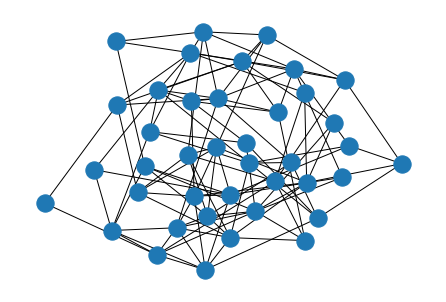

In [256]:
nx.draw(g01)